# Modeling Workbook

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

## Wrangling

In [2]:
from preprocessing import spotify_split, scale_data
from preprocessing import modeling_prep 

In [3]:
df = modeling_prep()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5733 entries, 6mecZbKK3JDeMdFRNxsCV5 to 2gVtrY8gCCynR9v0lyBL1m
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   danceability        5733 non-null   float64
 1   energy              5733 non-null   float64
 2   key                 5733 non-null   int64  
 3   loudness            5733 non-null   float64
 4   mode                5733 non-null   int64  
 5   speechiness         5733 non-null   float64
 6   instrumentalness    5733 non-null   float64
 7   liveness            5733 non-null   float64
 8   valence             5733 non-null   float64
 9   tempo               5733 non-null   float64
 10  duration_ms         5733 non-null   int64  
 11  time_signature      5733 non-null   int64  
 12  explicit            5733 non-null   int64  
 13  popularity          5733 non-null   int64  
 14  disc_number         5733 non-null   int64  
 15  track_number        5

In [5]:
df.head(2)

,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,explicit,popularity,disc_number,track_number,is_featured_artist,album,compilation,single
track_id,,,,,,,,,,,,,,,,,,,,
6mecZbKK3JDeMdFRNxsCV5,0.792,0.594,2,-8.544,1,0.300,0.0,0.244,0.351,82.512,232803,4,1,43,1,1,0,0,0,1
5PtMwNq8Dp31uYdGGacVJE,0.816,0.578,9,-6.912,1,0.233,0.0,0.114,0.265,148.077,193920,4,1,61,1,11,0,1,0,0


In [6]:
df.shape

(5733, 20)

---
### Split the Data

In [7]:
X_train, y_train, X_validate, y_validate, X_test, y_test, train, validate, test = spotify_split(df, 'popularity')
X_train.head(2)

Shape of train: (4012, 19) | Shape of validate: (861, 19) | Shape of test: (860, 19)
Percent train: 70.0        | Percent validate: 15.0       | Percent test: 15.0


,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,explicit,disc_number,track_number,is_featured_artist,album,compilation,single
track_id,,,,,,,,,,,,,,,,,,,
30bqVoKjX479ab90a8Pafp,0.585,0.471,4,-9.934,0,0.0616,0.0184,0.115,0.323,93.099,142000,4,1,1,1,0,0,0,1
0HO8pCseEpgozNi3z0R4bc,0.833,0.518,10,-10.126,0,0.3490,0.0000,0.635,0.773,90.004,120000,4,1,1,11,0,1,0,0


---
### Scale the Data

In [8]:
# Using MIN-MAX scaler
X_train_mm, X_validate_mm, X_test_mm = scale_data(train, validate, test, 'popularity', 'MinMax')
X_train_mm.head(3)

,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,explicit,disc_number,track_number,is_featured_artist,album,compilation,single
track_id,,,,,,,,,,,,,,,,,,,
30bqVoKjX479ab90a8Pafp,0.593306,0.439493,0.363636,0.580823,0.0,0.064033,0.019127,0.101302,0.328921,0.547673,0.234238,0.8,1.0,0.0,0.000000,0.0,0.0,0.0,1.0
0HO8pCseEpgozNi3z0R4bc,0.844828,0.489960,0.909091,0.572667,0.0,0.362786,0.000000,0.651741,0.787169,0.529466,0.194025,0.8,1.0,0.0,0.163934,0.0,1.0,0.0,0.0
643K3eEgRvdJiXjSzlz7dg,0.477688,0.654247,0.090909,0.745826,1.0,0.354470,0.000000,0.305600,0.865580,0.520216,0.435841,0.8,1.0,0.0,0.016393,0.0,1.0,0.0,0.0


<div class="alert alert-block alert-info">
    <b>Takeaways</b>:
    <li>Useable features are added to the data</li>
    <li>Data is split into train, validate, test</li>
    <li>Data is scaled by minimum and max values (0-1)</li>
</div>

--- 
## Feature Selection Tools

In [9]:
from preprocessing import rfe, select_kbest

In [10]:
# Select K Best Algorithm
skb_features = select_kbest(X_train_mm, y_train, 5)
skb_features

['speechiness', 'explicit', 'track_number', 'is_featured_artist', 'single']

In [11]:
# Recursive Feature Elmination Algorithm
rfe_features = rfe(X_train, y_train, 5)
rfe_features

['danceability', 'energy', 'speechiness', 'explicit', 'is_featured_artist']

<div class="alert alert-block alert-info">
    <b>Takeaways</b>:
    <li>Used tools that select important features</li>
    <li><i>Select K Best</i>: selects features according to the k highest scores</li>
    <li><i>Recursive Feature Elimination</i>: features that perform well on a simple linear regression model</li>
</div>

---
## Feature Groups

In [12]:
# Select K Best: Top 5 Features DF
X_tr_skb = X_train_mm[skb_features]
X_v_skb = X_validate_mm[skb_features]
X_te_skb = X_test_mm[skb_features]

In [13]:
# Recursive Feature Elimination: Top 5 Features DF
X_tr_rfe = X_train_mm[rfe_features]
X_v_rfe = X_validate_mm[rfe_features]
X_te_rfe = X_test_mm[rfe_features]

In [14]:
# Combo 3: Top 6 Features
top_feats = ['danceability', 'speechiness', 'explicit', 'is_featured_artist', 'track_number', 'energy', 'single']
X_tr_top = X_train_mm[top_feats]
X_v_top = X_validate_mm[top_feats]
X_te_top = X_test_mm[top_feats]

<div class="alert alert-block alert-info">
    <b>Takeaways</b>:
    <li>Set top 5 features from <i>Select K Best</i> to a dataframe for modeling</li>
    <li>Set top 5 features from <i>Recursive Feature Elimination</i> to a dataframe for modeling</li>
    <li>Set top 7 features from both <i>RFE and SKB</i> to a dataframe for modeling</li>
</div>

---
## Modeling
### Set the baseline

In [15]:
from model import get_baseline_metrics, linear_regression_model, lasso_lars
from model import polynomial_regression, svr_model, glm_model, evaluate_df

In [16]:
bl, bl_train_rmse = get_baseline_metrics(y_train)

RMSE (Root Mean Square Error) of Baseline on train data:
 22.897138


---
### Models using SKB Features

In [17]:
# OLS Model
lm_rmse, lm_rmse_v, lm_rmse_t = linear_regression_model(
    X_tr_skb, y_train, X_v_skb, y_validate, X_te_skb, y_test)

# LASSO + LARS Model
lars_rmse, lars_rmse_v, lars_rmse_t = lasso_lars(
    X_tr_skb, y_train, X_v_skb, y_validate, X_te_skb, y_test)

# Polynomial Features (squared, deg=2) with Linear Regression
lm_sq_rmse, lm_sq_rmse_v, lm_sq_rmse_t, lm_sq_pred_t = polynomial_regression(
    X_tr_skb, y_train, X_v_skb, y_validate, X_te_skb, y_test, 
    'Squared', degree=2) 

# Support Vector Regression with RBF Kernel
svr_rmse, svr_rmse_v, svr_rmse_t = svr_model(
    X_tr_skb, y_train, X_v_skb, y_validate, X_te_skb, y_test, 'RBF')

# General Linearized Model with Normal Distribution
glm_rmse, glm_rmse_v, glm_rmse_t, glm_pred_t = glm_model(
    X_tr_skb, y_train, X_v_skb, y_validate, X_te_skb, y_test, 
    'Normal', alpha=0, power=1)

RMSE for OLS using Linear Regression 

On train data:
 21.905982 

RMSE for LASSO + LARS 

On train data:
 22.897138 

RMSE for Polynomial Squared + Linear Regression 

On train data:
 21.82078 

RMSE for SVR using RBF Kernel 

On train data:
 21.960632 

RMSE for GLM using Normal Distribution 

On train data:
 21.934884 



In [18]:
# Dataframe Evaluation for Models with SKB features
columns = ['train_rmse', 'validate_rmse', 'test_rmse']
index = ['baseline', 'ols', 'lassolars', 'pf2_lr', 'SVM', 'GLM']
data = [[bl_train_rmse, '', ''],
        [lm_rmse, lm_rmse_v, ''],
        [lars_rmse, lars_rmse_v, ''],
        [lm_sq_rmse, lm_sq_rmse_v, ''], 
        [svr_rmse, svr_rmse_v, ''],
        [glm_rmse, glm_rmse_v, '']]

print('SKB FEATURES')
print(f'Model beat baseline by {abs((lm_sq_rmse_t - bl_train_rmse)/bl_train_rmse)*100:.2f}%')
print(skb_features)

pd.DataFrame(columns=columns, data=data, index=index).sort_values(by='train_rmse')

SKB FEATURES
Model beat baseline by 5.16%
['speechiness', 'explicit', 'track_number', 'is_featured_artist', 'single']


,train_rmse,validate_rmse,test_rmse
pf2_lr,21.820780,21.8672,
ols,21.905982,21.9519,
GLM,21.934884,21.9476,
SVM,21.960632,21.9514,
baseline,22.897138,,
lassolars,22.897138,22.8377,


---
### Models using RFE Features

In [19]:
# OLS Model
lm_rmse, lm_rmse_v, lm_rmse_t = linear_regression_model(
    X_tr_rfe, y_train, X_v_rfe, y_validate, X_te_rfe, y_test)

# LASSO + LARS Model
lars_rmse, lars_rmse_v, lars_rmse_t = lasso_lars(
    X_tr_rfe, y_train, X_v_rfe, y_validate, X_te_rfe, y_test)

# Polynomial Features (squared, deg=2) with Linear Regression
lm_sq_rmse, lm_sq_rmse_v, lm_sq_rmse_t, lm_sq_pred_t = polynomial_regression(
    X_tr_rfe, y_train, X_v_rfe, y_validate, X_te_rfe, y_test, 
    'Squared', degree=2) 

# Support Vector Regression with RBF Kernel
svr_rmse, svr_rmse_v, svr_rmse_t = svr_model(
    X_tr_rfe, y_train, X_v_rfe, y_validate, X_te_rfe, y_test, 'RBF')

# General Linearized Model with Normal Distribution
glm_rmse, glm_rmse_v, glm_rmse_t, glm_pred_t = glm_model(
    X_tr_rfe, y_train, X_v_rfe, y_validate, X_te_rfe, y_test, 
    'Normal', alpha=0, power=1)

RMSE for OLS using Linear Regression 

On train data:
 22.020966 

RMSE for LASSO + LARS 

On train data:
 22.897138 

RMSE for Polynomial Squared + Linear Regression 

On train data:
 21.884338 

RMSE for SVR using RBF Kernel 

On train data:
 22.03261 

RMSE for GLM using Normal Distribution 

On train data:
 22.026116 



In [20]:
# Dataframe Evaluation for Models with RFE features
columns = ['train_rmse', 'validate_rmse', 'test_rmse']
index = ['baseline', 'ols', 'lassolars', 'pf2_lr', 'SVM', 'GLM']
data = [[bl_train_rmse, '', ''],
        [lm_rmse, lm_rmse_v, ''],
        [lars_rmse, lars_rmse_v, ''],
        [lm_sq_rmse, lm_sq_rmse_v, ''], 
        [svr_rmse, svr_rmse_v, ''],
        [glm_rmse, glm_rmse_v, '']]

print('RFE FEATURES')
print(f'Model beat baseline by {abs((lm_sq_rmse_t - bl_train_rmse)/bl_train_rmse)*100:.2f}%')
print(rfe_features)

pd.DataFrame(columns=columns, data=data, index=index).sort_values(by='train_rmse')

RFE FEATURES
Model beat baseline by 4.71%
['danceability', 'energy', 'speechiness', 'explicit', 'is_featured_artist']


,train_rmse,validate_rmse,test_rmse
pf2_lr,21.884338,21.8565,
ols,22.020966,21.9541,
GLM,22.026116,21.9487,
SVM,22.032610,21.9516,
baseline,22.897138,,
lassolars,22.897138,22.8377,


---
### Models using COMBO: 7 Features

In [21]:
# OLS Model
lm_rmse, lm_rmse_v, lm_rmse_t = linear_regression_model(
    X_tr_top, y_train, X_v_top, y_validate, X_te_top, y_test)

# LASSO + LARS Model
lars_rmse, lars_rmse_v, lars_rmse_t = lasso_lars(
    X_tr_top, y_train, X_v_top, y_validate, X_te_top, y_test)

# Polynomial Features (squared, deg=2) with Linear Regression
lm_sq_rmse, lm_sq_rmse_v, lm_sq_rmse_t, lm_sq_pred_t = polynomial_regression(
    X_tr_top, y_train, X_v_top, y_validate, X_te_top, y_test, 
    'Squared', degree=2) 

# Support Vector Regression with RBF Kernel
svr_rmse, svr_rmse_v, svr_rmse_t = svr_model(
    X_tr_top, y_train, X_v_top, y_validate, X_te_top, y_test, 'RBF')

# General Linearized Model with Normal Distribution
glm_rmse, glm_rmse_v, glm_rmse_t, glm_pred_t = glm_model(
    X_tr_top, y_train, X_v_top, y_validate, X_te_top, y_test, 
    'Normal', alpha=0, power=1)

RMSE for OLS using Linear Regression 

On train data:
 21.796331 

RMSE for LASSO + LARS 

On train data:
 22.897138 

RMSE for Polynomial Squared + Linear Regression 

On train data:
 21.599581 

RMSE for SVR using RBF Kernel 

On train data:
 21.812662 

RMSE for GLM using Normal Distribution 

On train data:
 21.821093 



In [22]:
# Dataframe Evaluation for Models with COMBO features
columns = ['train_rmse', 'validate_rmse', 'test_rmse']
iindex = ['Baseline', 'Linear Regression', 'lassolars', 'Polynomial 2nd Degree', 'SVM', 'GLM']
data = [[bl_train_rmse, '', ''],
        [lm_rmse, lm_rmse_v, ''],
        [lars_rmse, lars_rmse_v, ''],
        [lm_sq_rmse, lm_sq_rmse_v, lm_sq_rmse_t], 
        [svr_rmse, svr_rmse_v, ''],
        [glm_rmse, glm_rmse_v, '']]

print('COMBO TOP FEATURES')
print(f'Model beat baseline by {abs((lm_sq_rmse_t - bl_train_rmse)/bl_train_rmse)*100:.2f}%')
print(top_feats)

mod_perf = pd.DataFrame(columns=columns, data=data, index=iindex).sort_values(by='train_rmse')
mod_perf

COMBO TOP FEATURES
Model beat baseline by 6.00%
['danceability', 'speechiness', 'explicit', 'is_featured_artist', 'track_number', 'energy', 'single']


,train_rmse,validate_rmse,test_rmse
Polynomial 2nd Degree,21.599581,21.5257,21.5236
Linear Regression,21.796331,21.7566,
SVM,21.812662,21.6988,
GLM,21.821093,21.7578,
Baseline,22.897138,,
lassolars,22.897138,22.8377,


**Conclusion**: 
<div class="alert alert-block alert-info">
    <b>Takeaways</b>:
    <li>COMBO features are the optimum combination for best model performance. These feature combinations are significant</li>
    <li>Second Degree Polynomial Features with Linear Regression is best performing model among all feature sets</li>
    <li>Final model predicts 6% better than baseline with RMSE of 21.52 on test data(unseen).</li>
</div>

---
## Model Performance Plot

In [23]:
from model import polyreg_predictions, plot_polyreg

In [24]:
lm_sq, y_pred_test, pf = polyreg_predictions(X_tr_top, X_te_top, y_train)

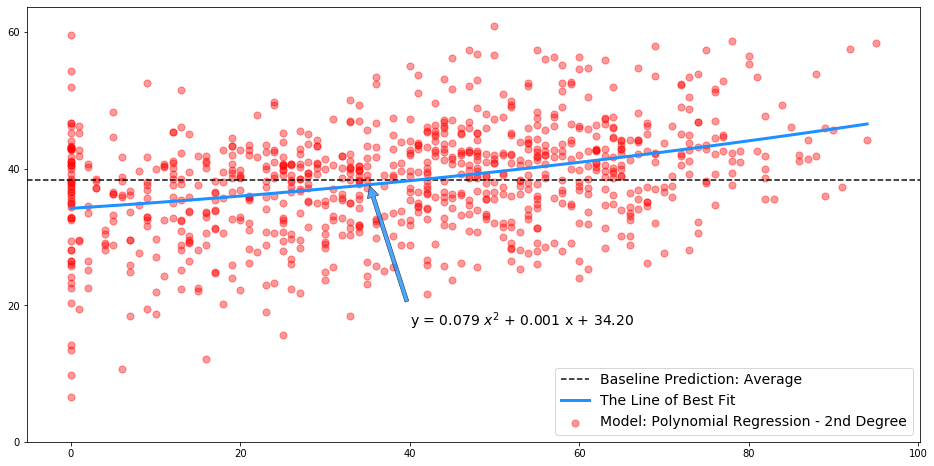

y = 0.079 $x^2$ + 0.001 x + 34.20


In [25]:
plot_polyreg(y_test, lm_sq_pred_t, y_pred_test, bl)

<div class="alert alert-block alert-info">
    <b>Takeaways</b>:
    Model is plotted against the baseline with predictions
</div>

---
# Top Drivers of the Top Model

In [26]:
from model import get_important_feats, plot_top_feats

In [27]:
# extracts the most influential features by 
# creating a dataframe of the most important features/combination,
# with their rank
feature_importances = get_important_feats(lm_sq, pf, X_tr_top)

In [28]:
# top 5 positive drivers of popularity
feature_importances.head()

,rank,importance
index,,
energy,1,44.288712
track_number,2,39.141969
danceability speechiness,3,37.674902
speechiness energy,4,21.006246
speechiness^2,5,16.910925


In [29]:
# Bottom 5 negative drivers of popularity
feature_importances.tail()

,rank,importance
index,,
energy^2,32,-37.705128
danceability track_number,33,-46.386784
speechiness track_number,34,-50.317919
speechiness,35,-73.828035
track_number single,36,-155.313290


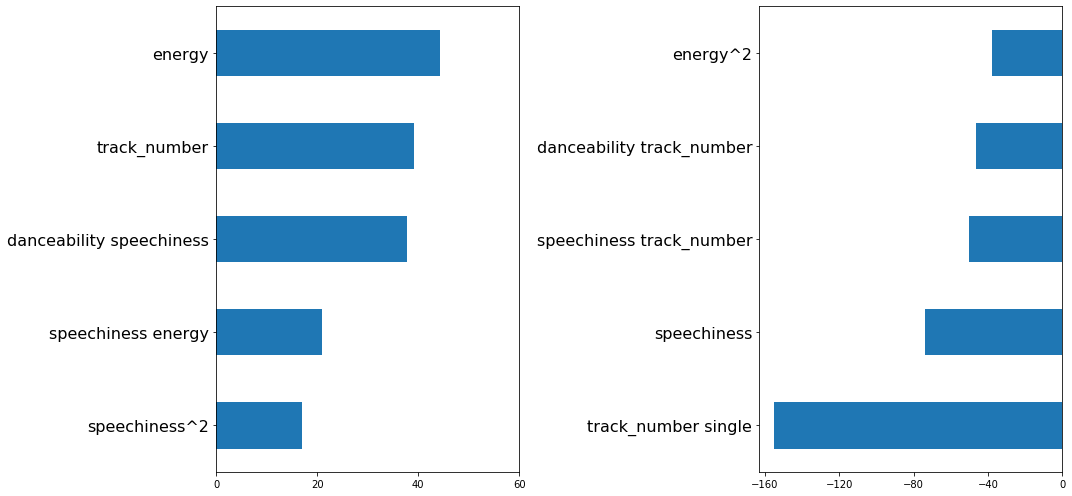

In [30]:
# plots the dataframes above
plot_top_feats(feature_importances)

<div class="alert alert-block alert-info">
    <b>Takeaways</b>:
    <li>Positive drivers on the left</li>
    <li>Negative drivers on the right</li>
    <li>Some of the feature combinations are shown that may have a more than linear relationship with song popularity</li>
</div> 